# Binary Classification of ILIAD'S Sentiment

**Course:** Data Science Foundations: Data Mining in Python

### Install & Import Lib

The Python library `nltk`, for "Natural Language Toolkit," contains most of the functions we need for text mining. NLTK can be installed with Python's `pip` command. This command only needs to be done once per machine.

The standard, shorter approach may work:

In [30]:
pip install nltk

If the above command didn't work, it may be necessary to be more explicit, in which case you could run the code below.

In [31]:
# import sys
#!{sys.executable} -m pip install nltk

Once `nltk` is installed, then load the libraries and data below.

In [32]:
# Import libraries
import re  # For regular expressions
import nltk  # For text functions
import matplotlib.pyplot as plt  # For plotting
import pandas as pd  # For dataframes

# Import corpora and functions from NLTK
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon  #for classifying
from nltk.tokenize import word_tokenize  #for tokenizing sents to words

# Download data for NLTK, quiet is True to prevent terminal o/p
nltk.download('stopwords', quiet=True)
nltk.download('opinion_lexicon', quiet=True)
nltk.download('punkt', quiet=True)

# Use Matplotlib style sheet
plt.style.use('ggplot')

### IMPORT DATA

In [33]:
df = pd.read_csv('Iliad.txt',sep='\t').dropna().drop('gutenberg_id', 1) #each new line is a new row

df.head(10)

,text
0,THE ILIAD OF HOMER
2,RENDERED INTO ENGLISH BLANK VERSE.
3,BY
5,EDWARD EARL OF DERBY.
10,PREFACE.
13,"In the spring of 1862 I was induced, at the re..."
14,"friends, to print, for private circulation onl..."
15,"""Translations of Poems Ancient and Modern,"" in..."
16,first Book of the Iliad. The opinions expresse...
17,judges of the degree of success which had atte...


## Data Prep


### Tokenize the Data

- A "token" is the level of analysis for text mining.
- In this case, the tokens will be individual words, which is most common, but tokens can also be pairs or triplets of words, sentences, and so on.
- In the tokenization process, it is common to standardize capitalization and remove non-word characters.

In [34]:
def clean_text(text):
    text = text.lower()  # Convert all text to lowercase
    text = text.replace("'", '')
    text = re.sub(r'[^\w]', ' ', text)  # Leave only word characters
    text = re.sub(r'\s+', ' ', text)  # Omit extra space characters
    text = text.strip() #get only the text
    return text

df['text'] = df['text'].map(clean_text) 
df.head()

,text
0,the iliad of homer
2,rendered into english blank verse
3,by
5,edward earl of derby
10,preface


In [35]:
df['text'] = df['text'].map(word_tokenize) # Split text into word tokens
df.head()

,text
0,"[the, iliad, of, homer]"
2,"[rendered, into, english, blank, verse]"
3,[by]
5,"[edward, earl, of, derby]"
10,[preface]


### Collect Tokens into a Single Series

In [36]:
df = df.text.explode().to_frame('token')
df.head(10)

,token
0,the
0,iliad
0,of
0,homer
2,rendered
2,into
2,english
2,blank
2,verse
3,by


### Sort Tokens by Frequency

In [37]:
df.token.value_counts().head(10)

the     9901
and     5541
of      3947
to      3558
his     2840
in      2409
he      2017
with    1947
from    1256
a       1247
Name: token, dtype: int64

### Remove Stop Words

- Stop words are common words such as "the," "and", and "a" that may interfere with the semantic analysis of text.
- It is common to use a lexicon or established list of stop words.
- However, different stop word lexicons may process text differently.
- It is also possible to add specific words to a custom stop word list.

In [38]:
stopwords = set(stopwords.words('english')) # load stopwords

df = df[~df.token.isin(stopwords)]

### Sort Revised Tokens by Frequency

In [39]:
df.token.value_counts().head(10)

son         867
thou        756
thus        731
thy         688
greeks      529
achilles    445
hector      429
ships       423
thee        421
th          396
Name: token, dtype: int64

We can see a lot of thou, thy, thee, which is relevant to this archaic novel.

## Classify Sentiments

### Identify Valenced Words with the "Opinion" Lexicon

In [40]:
sentiment_lexicon = {
    **{w: 'positive' for w in opinion_lexicon.positive()},
    **{w: 'negative' for w in opinion_lexicon.negative()}
}

df['sentiment'] = df['token'].map(sentiment_lexicon)
df = df[~df.sentiment.isna()] # omit words out of opinion_lexicon, not always helpful but omission doesn't hinder here

df.head(10)

,token,sentiment
15,modern,positive
17,success,positive
19,well,positive
19,great,positive
20,sufficiently,positive
21,encourage,positive
21,work,positive
22,urgent,negative
24,regret,negative
24,sincere,positive


### Sort Sentiment Words by Frequency

In [41]:
df.token.value_counts().head(10)

well       279
death      236
great      184
brave      165
fell       164
mighty     163
valiant    160
bore       152
fair       152
godlike    144
Name: token, dtype: int64

### Summarize the Sentiment Words

In [42]:
summary_df = df.sentiment.value_counts().to_frame('n')
summary_df['%'] = summary_df['n'] / summary_df.n.sum()

summary_df.round(3)

,n,%
negative,6387,0.552
positive,5194,0.448


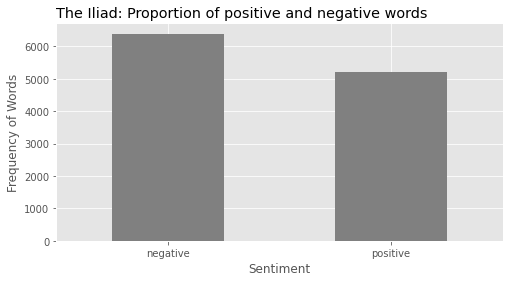

In [43]:
summary_df.n.plot.bar(legend=False, figsize=(8, 4), grid=True, color='gray')
plt.xlabel('Sentiment')
plt.ylabel('Frequency of Words')
plt.title('The Iliad: Proportion of positive and negative words', loc='left')
plt.xticks(rotation=0);